In [26]:
import pandas as pd

from google.colab import drive 
drive.mount('/content/drive')

import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  

from PIL import Image # getting images in notebook


import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
path="/content/drive/MyDrive/dataset/phishing_site_urls (1).csv"
df=pd.read_csv(path)
df

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [28]:
df.isnull().sum()
# checks if the dataaset has null values
# .sum() -> counts number of null values

URL      0
Label    0
dtype: int64

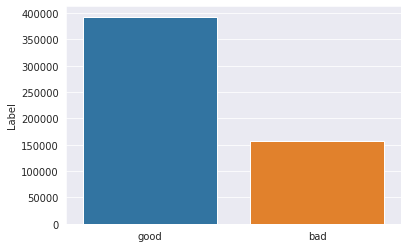

In [29]:
import seaborn as sns # it is a data visualisation library (visualizes the good and bad based on the stats)
import matplotlib.pyplot as plt # used to represent the graph
label_counts = pd.DataFrame(df.Label.value_counts()) # counts total number of labeles

sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label) # in the bilow graph good is a lable and the large number of count. this barplot is used to show it in the bar graph

#this whole code represents the number of good and bad url's from the dataset as a graph

In [59]:
from nltk.tokenize import RegexpTokenizer # this tokemize id used for devision
tokenizer = RegexpTokenizer(r'[A-Za-z]+') # based on the declared statement the tokenizer divides the dataset
#after tokenizer we split the word by word according to the expression
tokenizer.tokenize(df.URL[1]) # the URL is a dataset that contains the words

['www',
 'dghjdgf',
 'com',
 'paypal',
 'co',
 'uk',
 'cycgi',
 'bin',
 'webscrcmd',
 'home',
 'customer',
 'nav',
 'loading',
 'php']

In [31]:

# import time 
# print('Getting words tokenized ...')
# t0= time.perf_counter()
# df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
# t1 = time.perf_counter() - t0
# print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 3.5163773869999204 sec


In [32]:
df.sample(5) # displays random url's seperated as url's and words imported from url's
# here the sample of 5 shows the random 5 url from the trained model(df)

,URL,Label,text_tokenized
440075,studio360s.com/,good,"[studio, s, com]"
88860,journals.iucr.org/a/services/latexstyle.html,good,"[journals, iucr, org, a, services, latexstyle,..."
407874,nytimes.com/2001/08/24/nyregion/as-public-reco...,good,"[nytimes, com, nyregion, as, public, records, ..."
138056,sifinancial.com.au/ran,bad,"[sifinancial, com, au, ran]"
43189,remax.com.viknashop.org.ua/remax/index.htm,bad,"[remax, com, viknashop, org, ua, remax, index,..."


In [33]:
from nltk.stem.snowball import SnowballStemmer # the SnowballStemmer trimes the common words like for, to end and only gets the nouns
stemmer = SnowballStemmer("english") # choose a language
print('Getting words stemmed ...')
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l]) # displays the extracted words
df.sample(5)

Getting words stemmed ...


,URL,Label,text_tokenized,text_stemmed
408413,oaksterdamuniversity.com/,good,"[oaksterdamuniversity, com]","[oaksterdamunivers, com]"
171492,en.wikipedia.org/wiki/Barbara_Lee,good,"[en, wikipedia, org, wiki, Barbara, Lee]","[en, wikipedia, org, wiki, barbara, lee]"
440128,stuff.co.nz/manawatu-standard/sport/soccer/,good,"[stuff, co, nz, manawatu, standard, sport, soc...","[stuff, co, nz, manawatu, standard, sport, soc..."
162533,crosswordheaven.com/clues/george-___-longtime-...,good,"[crosswordheaven, com, clues, george, longtime...","[crosswordheaven, com, clue, georg, longtim, c..."
487025,lpmxp1014.com,bad,"[lpmxp, com]","[lpmxp, com]"


In [34]:
# print('Getting joiningwords ...')
# t0= time.perf_counter() 
# df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

# df.sample(5)

Getting joiningwords ...


,URL,Label,text_tokenized,text_stemmed,text_sent
82329,en.wikipedia.org/wiki/ISO_8859,good,"[en, wikipedia, org, wiki, ISO]","[en, wikipedia, org, wiki, iso]",en wikipedia org wiki iso
353312,hollywood.com/celebrity/1386214/Rachelle_Lefevre,good,"[hollywood, com, celebrity, Rachelle, Lefevre]","[hollywood, com, celebr, rachell, lefevr]",hollywood com celebr rachell lefevr
347386,gordonpoole.com/?artistID=1750,good,"[gordonpoole, com, artistID]","[gordonpool, com, artistid]",gordonpool com artistid
181135,en.wikipedia.org/wiki/Template:Infobox_Film,good,"[en, wikipedia, org, wiki, Template, Infobox, ...","[en, wikipedia, org, wiki, templat, infobox, f...",en wikipedia org wiki templat infobox film
149141,bigjournalism.com/sgrammatico/2010/09/23/tomor...,good,"[bigjournalism, com, sgrammatico, tomorrows, n...","[bigjourn, com, sgrammatico, tomorrow, news, t...",bigjourn com sgrammatico tomorrow news today p...


In [35]:
bad_sites = df[df.Label == 'bad'] # storing bad labels in bad_sites
good_sites = df[df.Label == 'good'] # storing good labels in good_sites

In [36]:
bad_sites.head() # displays the first 5 damples. If we use tail is will display last five

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [37]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [38]:
# from PIL import Image 
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
#                    title = None, title_size=40, image_color=False):
#     stopwords = set(STOPWORDS)
#     more_stopwords = {'com','http'}
#     stopwords = stopwords.union(more_stopwords)

#     wordcloud = WordCloud(background_color='white',
#                     stopwords = stopwords,
#                     max_words = max_words,
#                     max_font_size = max_font_size, 
#                     random_state = 42,
#                     mask = mask)
#     wordcloud.generate(text)
    
#     plt.figure(figsize=figure_size)
#     if image_color:
#         image_colors = ImageColorGenerator(mask);
#         plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
#         plt.title(title, fontdict={'size': title_size,  
#                                   'verticalalignment': 'bottom'})
#     else:
#         plt.imshow(wordcloud);
#         plt.title(title, fontdict={'size': title_size, 'color': 'green', 
#                                   'verticalalignment': 'bottom'})
#     plt.axis('off');
#     plt.tight_layout()  

In [39]:
# data = good_sites.text_sent
# data.reset_index(drop=True, inplace=True)

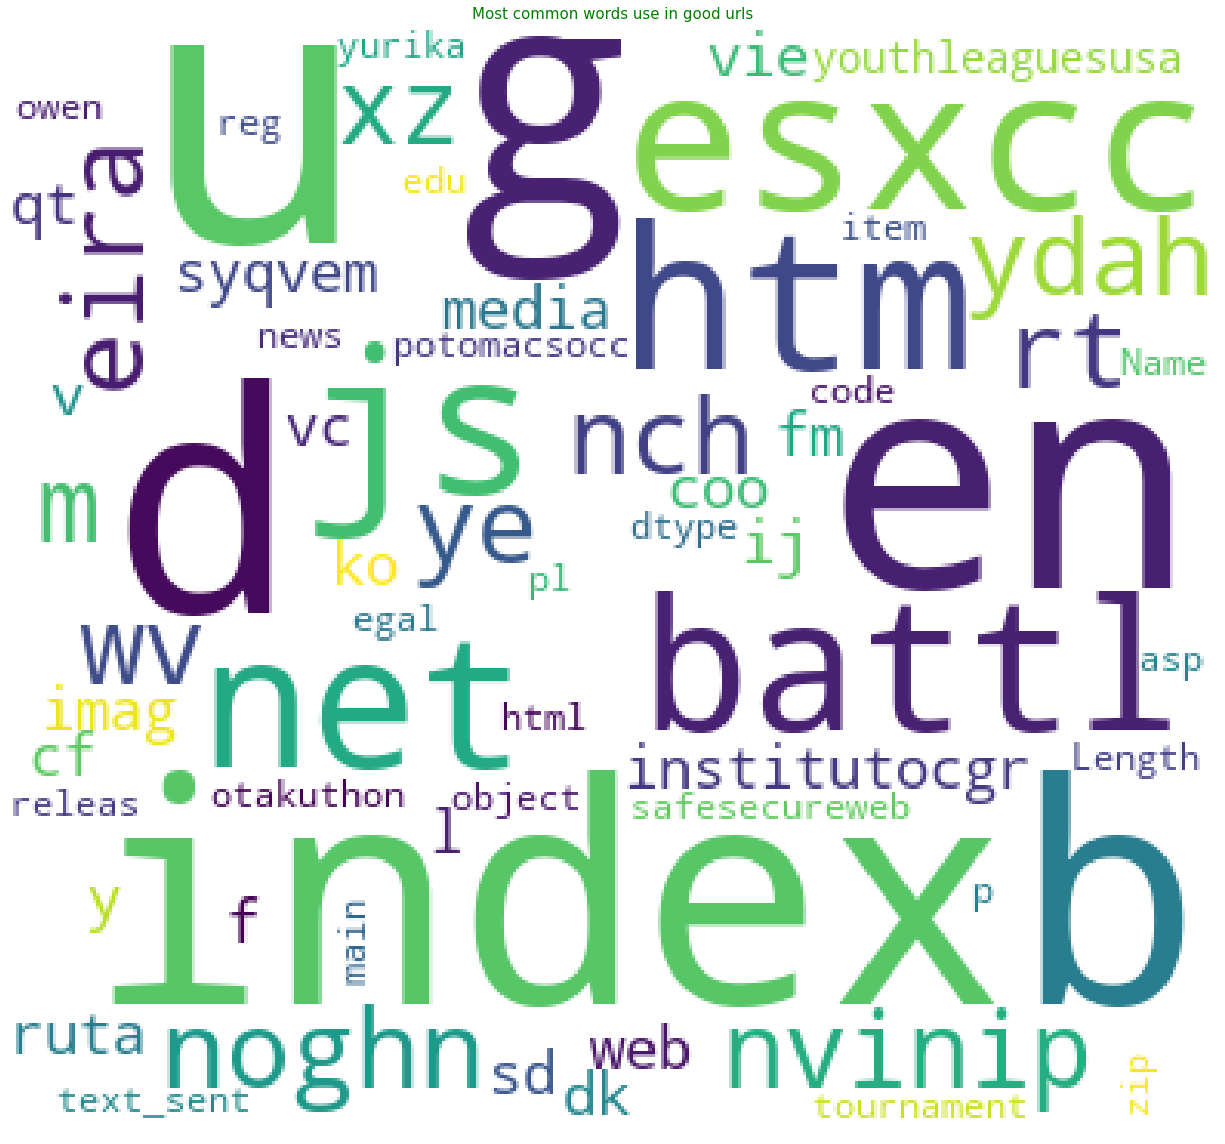

In [40]:
# from PIL import Image
# import numpy as np
# common_text = str(data)
# common_mask = np.array(Image.open('/content/drive/MyDrive/dataset/360_F_399343523_mlnzNu8ROMuk3jcvjENuYQ7LFAozCdUo.jpg'))
# plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
#                title = 'Most common words use in good urls', title_size=15)

In [41]:
# data = bad_sites.text_sent
# data.reset_index(drop=True, inplace=True)

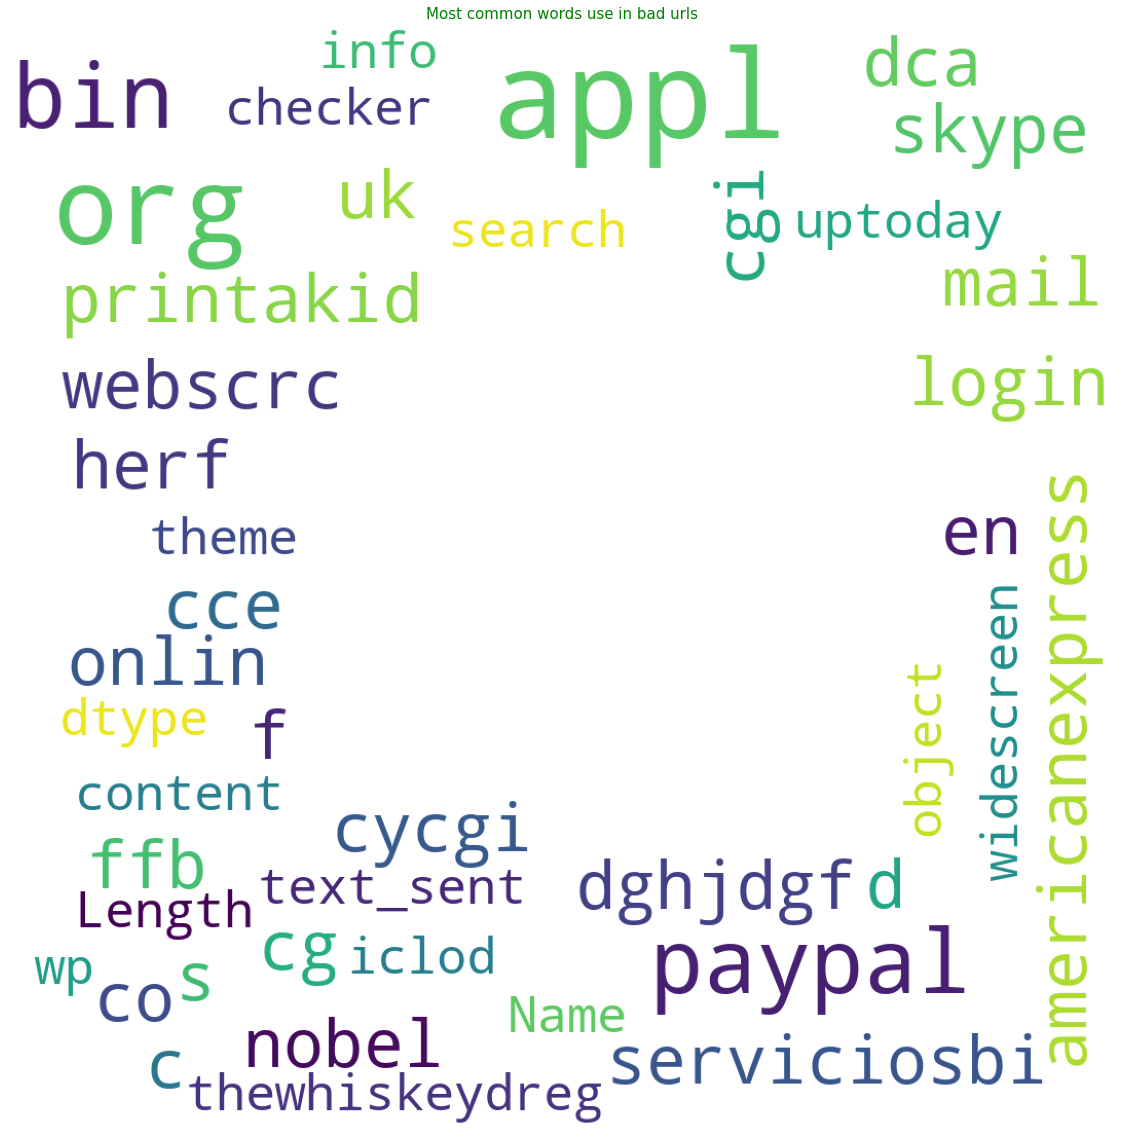

In [42]:
# common_text = str(data)
# common_mask = np.array(Image.open('/content/drive/MyDrive/dataset/chat.png'))
# plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
#                title = 'Most common words use in bad urls', title_size=15)

In [43]:
# pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 6.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [60]:
# list_urls = ['https://www.ezeephones.com/','https://www.ezeephones.com/about-us'] #here i take phishing sites 
# links_with_text = []

In [61]:
#create cv object
cv = CountVectorizer() # this is used to convert the english words into binary numbers

In [46]:
feature = cv.fit_transform(df.text_sent) #transform all text which we tokenize and stemed
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
trainX, testX, trainY, testY = train_test_split(feature, df.Label) # splitting the dataset to train the model

In [48]:
# create lr object
lr = LogisticRegression() 

In [49]:
lr.fit(trainX,trainY) # training the dataset

LogisticRegression()

In [50]:
lr.score(testX,testY) # shows the accuracy 

0.9645616257818359

In [63]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2) # stores all the scores we got like accuracy into a dictionary. 
print(Scores_ml)

{'Logistic Regression': 0.96}


Training Accuracy : 0.9791363780888281
Testing Accuracy : 0.9645616257818359

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36748
        Good       0.99      0.96      0.98    100589

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


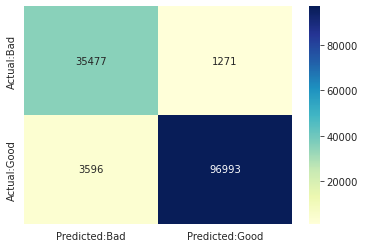

In [52]:
#confusion matrix

print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [53]:
# create mnb object
mnb = MultinomialNB() #nav bias. calculates the probability of good labes or bad labels

In [54]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [55]:
mnb.score(testX,testY)


0.9574404566868361

In [56]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9740758090235893
Testing Accuracy : 0.9574404566868361

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.93      0.92     38248
        Good       0.97      0.97      0.97     99089

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


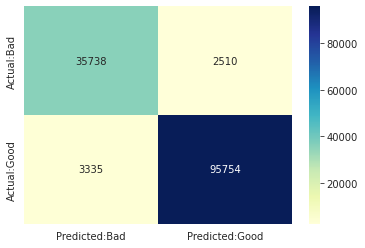

In [57]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

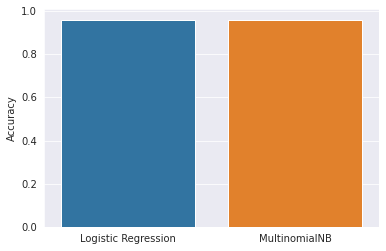

In [58]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy']) # Scores ml is the dictionary where we have saved all the scores we obtained
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)